<a href="https://colab.research.google.com/github/marlo37/TF-OD-API/blob/main/tf_record_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference : https://www.tensorflow.org/tutorials/load_data/tf_records

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

In [2]:
# value를 tf.Example에 대응되는 형태로 변환하기 위한 함수들
def _bytes_feature(value):
  """string / byte 타입을 받아서 byte list를 리턴합니다."""
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """float / double 타입을 받아서 float list를 리턴합니다."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """bool / enum / int / uint 타입을 받아서 int64 list를 리턴합니다."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

print(_bytes_feature(b'test_string'))
'''
bytes_list {
  value: "test_string"
}
'''
print(_bytes_feature(u'test_bytes'.encode('utf-8')))
'''
bytes_list {
  value: "test_bytes"
}
'''
print(_float_feature(np.exp(1)))
'''
float_list {
  value: 2.71828174591
}
'''
print(_int64_feature(True))
'''
int64_list {
  value: 1
}
'''
print(_int64_feature(1))
'''
int64_list {
  value: 1
}
'''


bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}



'\nint64_list {\n  value: 1\n}\n'

In [3]:
#.SerializeToString 함수를 이용해 binary string으로 변환할 수 있습니다.
feature = _float_feature(np.exp(1))
print(feature.SerializeToString())

b'\x12\x06\n\x04T\xf8-@'


In [4]:
def serialize_example(feature0, feature1, feature2, feature3):
  """
  파일에 write하기 위한 tf.Example messeage를 생성합니다.
  """

  # key - feature name
  # value - tf.Example에 적합한 타입
  # 형태의 dictionary를 생성합니다.
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  # tf.train.Example을 이용해서 Feature messeage를 생성합니다.
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))

  return example_proto.SerializeToString()

In [5]:
# serialize_example 함수를 이용해서 binary string으로 serialize합니다.
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
print(serialized_example)

# serilization된 데이터를 tf.train.Example.FromString 메소드를 이용해서 decode합니다.
example_proto = tf.train.Example.FromString(serialized_example)
print(example_proto)

b'\nR\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?'
features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}



In [6]:
filename = 'test.tfrecord'
# observation 횟수
n_observations = int(1e4)
# boolean feature - [False or True]
feature0 = np.random.choice([False, True], n_observations)
# integer feature - [0 .. 4]
feature1 = np.random.randint(0, 5, n_observations)
# string feature
strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

# float feature - from standard normal distribution
feature3 = np.random.randn(n_observations)

# tf.Example 데이터를 tfrecord 파일에 write합니다.
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(n_observations):
    example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
    writer.write(example)

<ipython-input-2-5b42bdc6e614>:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [7]:
record_iterator = tf.data.TFRecordDataset(filename)

for string_record in record_iterator:
  example = tf.train.Example()
  example.ParseFromString(string_record.numpy())

  print(example)

  # 데모 목적으로 1번째 값만 출력하고 종료합니다.
  break

# example object를 python dictionary 형태로 mapping합니다.
print(dict(example.features.feature))
print(example.features.feature['feature3'])
'''
float_list {
  value: 1.63795161247
}
'''
print(example.features.feature['feature3'].float_list.value)
'''
[1.6379516124725342]
'''


features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "cat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 2.1253960132598877
      }
    }
  }
}

{'feature2': bytes_list {
  value: "cat"
}
, 'feature3': float_list {
  value: 2.1253960132598877
}
, 'feature1': int64_list {
  value: 0
}
, 'feature0': int64_list {
  value: 0
}
}
float_list {
  value: 2.1253960132598877
}

[2.1253960132598877]


'\n[1.6379516124725342]\n'

In [8]:
# sample 이미지를 다운로드하고 화면에 띄웁니다.
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')


15477/15477 [==============================] - 0s 0us/step


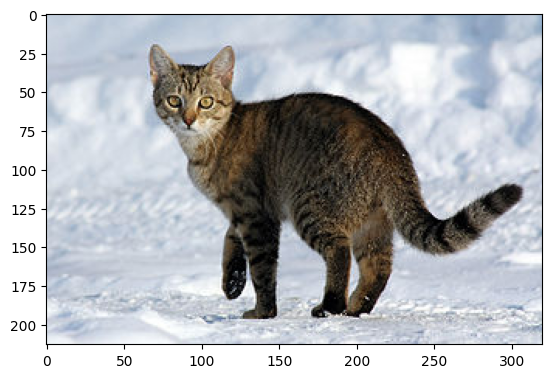

In [9]:
cat_in_snow_image = Image.open(cat_in_snow)
plt.imshow(cat_in_snow_image)
plt.show()

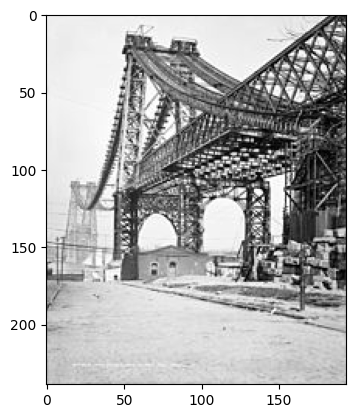

In [10]:
williamsburg_bridge_image = Image.open(williamsburg_bridge)
plt.imshow(williamsburg_bridge_image, cmap='gray')
plt.show()

In [11]:
# 예제로 cat 이미지의 image 정보(hegiht, widht, depth, image_raw)와 레이블 정보(label)를 저장합니다.
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

In [12]:
image_string = open(cat_in_snow, 'rb').read()
label = image_labels[cat_in_snow]

In [13]:
# 적절한 dictionary 값을 생성합니다.
def image_example(image_string, label):
  image_shape = tf.image.decode_jpeg(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

In [14]:
# 저장된 값을 15번째 라인까지 출력합니다.
for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)
print('...')

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [15]:
# 예제 이미지들(cat, bridge)을 images.tfrecords 파일에 저장합니다.
with tf.io.TFRecordWriter('images.tfrecords') as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [16]:
def _parse_image_function(example_proto):
  # tf.Example을 parsing합니다.
  return tf.io.parse_single_example(example_proto, image_feature_description)


In [17]:
# feature를 묘사하는 dictionary를 생성합니다.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

In [18]:
# tf.data.TFRecordDataset을 생성합니다.
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
print(parsed_image_dataset)

<_MapDataset element_spec={'depth': TensorSpec(shape=(), dtype=tf.int64, name=None), 'height': TensorSpec(shape=(), dtype=tf.int64, name=None), 'image_raw': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'width': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


height : 213
width : 320
depth : 3


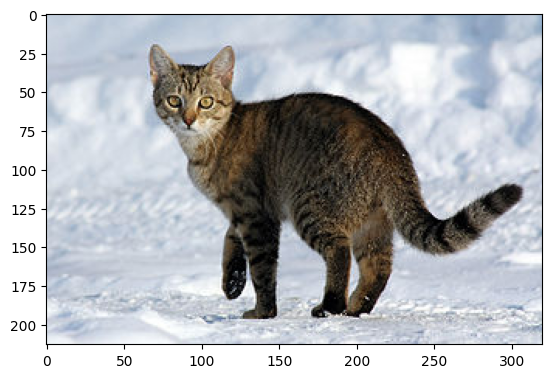

height : 239
width : 194
depth : 1


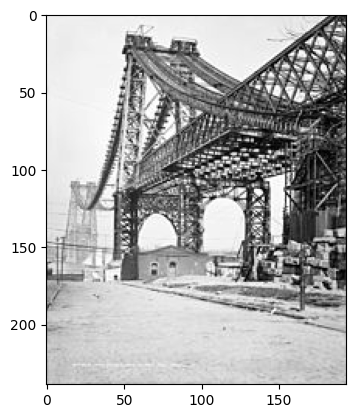

In [19]:
for image_features in parsed_image_dataset:
  print('height :', image_features['height'].numpy())
  print('width :', image_features['width'].numpy())
  print('depth :', image_features['depth'].numpy())

  encoded_jpg_io = io.BytesIO(image_features['image_raw'].numpy())
  image = Image.open(encoded_jpg_io)
  if image_features['depth'].numpy() == 1:
    plt.imshow(image, cmap='gray')
    plt.show()
  else:
    plt.imshow(image)
    plt.show()